In [7]:
import ORCA_plot as utl
import matplotlib.pyplot as plt
import numpy as np
import os

In [8]:
file_Cu_I = np.loadtxt(os.path.join("data", "Cu_I.out.abs.stk"))
file_Cu_II = np.loadtxt(os.path.join("data", "Cu_II.out.abs.stk"))

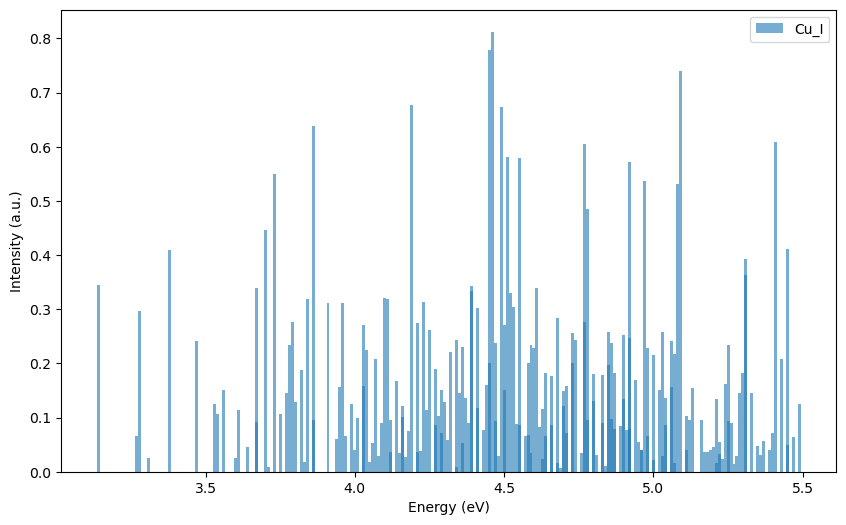

In [9]:
Cu_I = utl.plot(file_Cu_I, plot_bar = True, name = "Cu_I", x_name = "Energy (eV)", y_name = "Intensity (a.u.)", width = 0.01, normalized = False)

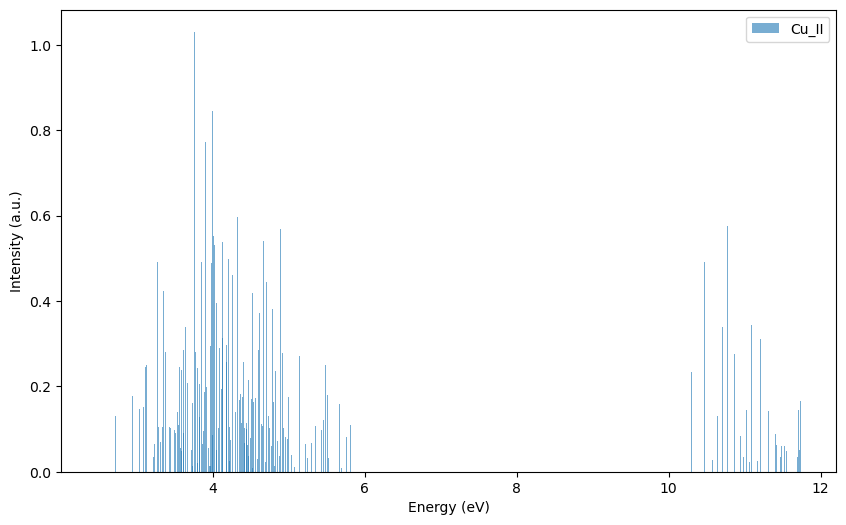

In [10]:
Cu_II = utl.plot(file_Cu_II, plot_bar = True, name = "Cu_II", x_name = "Energy (eV)", y_name = "Intensity (a.u.)", width = 0.01, normalized = False)

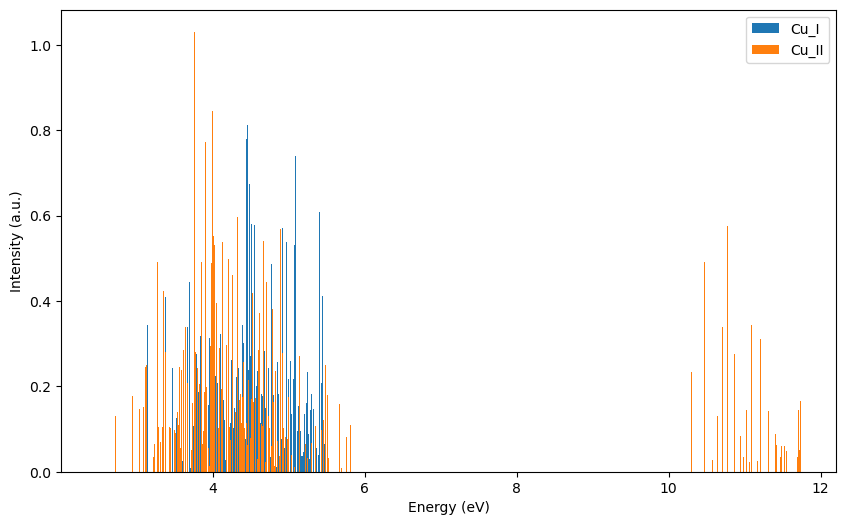

In [11]:
data_list = [
    {"file": file_Cu_I, "name": "Cu_I"},
    {"file": file_Cu_II, "name": "Cu_II"}
]

plt.figure(figsize=(10, 6))

for data in data_list:
    name, x, y_normalized = utl.plot(data["file"], plot=False, name=data["name"])
    plt.bar(x, y_normalized, label=name, width=0.01 )


plt.xlabel("Energy (eV)")
plt.ylabel("Intensity (a.u.)")
plt.legend()
plt.show()